# VGGNet(Visual Geometry Group Net)

이번에는 VGGNet을 중심으로 CNN 모델의 발전 과정을 이해하고, TensorFlow와 PyTorch를 사용하여 VGGNet을 직접 구현해보겠습니다.

- 또한, **전이 학습(Transfer Learning)**을 통해 사전 학습된 VGGNet 모델을 불러와 사용하는 방법을 알아보겠습니다.

## 1. CNN 모델의 발전 과정

**컨볼루션 신경망(CNN)**은 이미지 인식 분야에서 혁신을 일으킨 딥러닝 모델입니다. 다음은 주요 CNN 모델들의 발전 과정입니다:\

- 1998: LeNet – Gradient-based Learning Applied to Document Recognition
- 2012: AlexNet – ImageNet Classification with Deep Convolutional Neural Network
- 2014: VGGNet – Very Deep Convolutional Networks for Large-Scale Image Recognition
- 2014: GoogLeNet – Going Deeper with Convolutions
- 2015: ResNet – Deep Residual Learning for Image Recognition
- 2017: MobileNet – MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Application
- 2017: DenseNet – Densely Connected Convolutional Networks
- 2019: EfficientNet – EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks

## 2. VGGNet 소개

### VGGNet이란?

- VGGNet은 2014년 ILSVRC(ImageNet Large Scale Visual Recognition Competition)에서 2위를 차지한 모델로, **7.32%**의 상위-5 오류율(top-5 error rate)을 기록했습니다.
- VGGNet은 매우 깊은 신경망 구조를 채택하여 이미지 인식 성능을 크게 향상시킨 대표적인 CNN 모델입니다.
- 이후 많은 연구와 모델에 큰 영향을 미쳤습니다.

  <img src="https://deargen.blog/wp-content/uploads/2016/12/1.-ec9db4ebafb8eca780eb84b7.jpg">

### VGGNet의 특징

- 활성화 함수
    - 모든 은닉층에 ReLU 함수 사용.
- 구조
    - 합성곱 계층과 풀링 계층으로 구성된 5개의 블록과, 분류를 위한 3개의 완전 연결 계층으로 구성.
- 데이터 보강
    - 이미지 변환, 좌우 반전 등을 통해 데이터셋을 인위적으로 증가시킴.
- 합성곱 커널
    - 작은 크기의 3x3 커널을 사용하여 깊이를 늘림.
- 패딩
    - 모든 합성곱과 최대 풀링 계층에 padding='same' 적용.
- 드롭아웃
    - 완전 연결 계층에서 드롭아웃 사용.

### VGGNet의 기여

- 수용영역(ERF, Effective Receptive Field): 두 개의 3x3 합성곱 계층을 쌓으면 하나의 5x5 합성곱 계층과 동일한 수용영역을 가짐.
- 매개변수 감소: 작은 합성곱 계층을 많이 사용하여 매개변수의 수를 줄이고, 모델의 비선형성을 증가시킴.
- 성능 향상: 깊은 신경망 구조를 통해 이미지 분류 성능을 크게 향상시킴.

<img src="https://www.researchgate.net/publication/355177485/figure/fig3/AS:1079259032494081@1634326813561/Architecture-of-pre-trained-VGG-16-Left-and-VGG-19-Right-61.png">

## 3. TensorFlow를 사용한 VGGNet 구현


### 3.1 필요한 라이브러리 Import

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

### 3.2 모델 구조 구현

- VGGNet의 기본 구조를 따라 층별로 레이어를 쌓아 모델을 구성해보겠습니다.

In [ ]:
def build_vggnet():
    input_layer = Input(shape=(224, 224, 3))

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(1000, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    return model

# 모델 인스턴스 생성
vggnet = build_vggnet()

1. 입력 레이어
    - 입력 이미지의 크기를 (224, 224, 3)으로 설정합니다.

2. 합성곱 블록(Block 1~5)
    - 각 블록은 여러 개의 합성곱(Conv2D) 계층과 하나의 최대 풀링(MaxPooling2D) 계층으로 구성됩니다.
    - 합성곱 계층은 작은 크기(3x3)의 필터를 사용하여 깊이를 증가시킵니다.

3. 완전 연결 계층

    - Flatten 레이어를 통해 특징 맵을 1차원 벡터로 변환합니다.
    - 두 개의 Dense 레이어는 각각 4096개의 유닛을 가지며, ReLU 활성화 함수를 사용합니다.
    - Dropout 레이어를 통해 과적합을 방지합니다.
    - 마지막 Dense 레이어는 1000개의 클래스에 대한 소프트맥스 출력을 생성합니다.


### 3.3 모델 요약

모델의 구조와 파라미터 수를 확인하기 위해 summary를 사용합니다.

In [ ]:
# TensorFlow 모델 요약
vggnet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

- 총 파라미터 수는 약 138,357,544개로 매우 큽니다.

### 3.4 모델 학습

- 실제로 모델을 학습시키려면 대량의 데이터와 긴 학습 시간이 필요합니다.

- 따라서 여기서는 모델 구조 구현에 초점을 맞추고, 전이 학습을 통해 사전 학습된 모델을 사용하는 방법을 알아보겠습니다.

## 4. PyTorch를 사용한 VGGNet 구현

## 4.1 필요한 라이브러리 Import

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### 4.2 모델 구조 구현

PyTorch에서 VGGNet을 구현하기 위해 nn.Module을 상속하여 클래스를 정의 후 구현해보도록 하겠습니다.

In [ ]:
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),  # conv1_1
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # conv1_2
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # pool1

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # conv2_1
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  # conv2_2
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # pool2

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # conv3_1
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # conv3_2
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # conv3_3
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # pool3

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),  # conv4_1
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # conv4_2
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # conv4_3
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # pool4

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # conv5_1
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # conv5_2
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # conv5_3
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # pool5
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),  # input size may vary
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 1000),  # 1000 classes for ImageNet
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

vggnet = VGGNet()


1. 특징 추출 부분 (self.features)

    - 5개의 합성곱 블록으로 구성되며, 각 블록은 여러 개의 합성곱(Conv2d) 계층과 하나의 최대 풀링(MaxPool2d) 계층으로 이루어져 있습니다.
    - 각 합성곱 계층은 작은 3x3 필터를 사용하여 깊이를 증가시킵니다.

2. 분류 부분 (self.classifier)

- Flatten 레이어를 통해 특징 맵을 1차원 벡터로 변환합니다.
- 두 개의 Linear 레이어는 각각 4096개의 유닛을 가지며, ReLU 활성화 함수를 사용합니다.
- Dropout 레이어를 통해 과적합을 방지합니다.
- 마지막 Linear 레이어는 1000개의 클래스에 대한 출력을 생성합니다.


### 4.3 모델 요약
모델의 구조와 파라미터 수를 확인하기 위해 torchsummary를 사용합니다.

In [ ]:
# device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vggnet.to(device)

from torchsummary import summary
summary(vggnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
# 모델 요약 출력
!pip install torchinfo

batch_size= 32

from torchinfo import summary
# to match the expected input channels (3 for RGB) and image size (224x224)
# for the GoogLeNet model.
summary(vggnet, input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGGNet                                   [32, 1000]                --
├─Sequential: 1-1                        [32, 512, 7, 7]           --
│    └─Conv2d: 2-1                       [32, 64, 224, 224]        1,792
│    └─ReLU: 2-2                         [32, 64, 224, 224]        --
│    └─Conv2d: 2-3                       [32, 64, 224, 224]        36,928
│    └─ReLU: 2-4                         [32, 64, 224, 224]        --
│    └─MaxPool2d: 2-5                    [32, 64, 112, 112]        --
│    └─Conv2d: 2-6                       [32, 128, 112, 112]       73,856
│    └─ReLU: 2-7                         [32, 128, 112, 112]       --
│    └─Conv2d: 2-8                       [32, 128, 112, 112]       147,584
│    └─ReLU: 2-9                         [32, 128, 112, 112]       --
│    └─MaxPool2d: 2-10                   [32, 128, 56, 56]         --
│    └─Conv2d: 2-11                      [32, 256, 56, 56]         29

- 총 파라미터 수는 TensorFlow 구현과 동일하게 약 138,357,544개입니다.

### 4.4 모델 학습
마찬가지로 ImageNet 데이터셋이 없으므로, 모델 학습은 생략하고 구조 구현에 집중합니다.

## 5. 전이 학습을 통한 사전 학습된 VGGNet 사용

전이 학습은 사전 학습된 모델의 가중치를 재사용하여 새로운 작업에 빠르게 적응하는 방법입니다. 이를 통해 학습 시간을 절약하고 높은 성능을 얻을 수 있습니다.

## 5.1 TensorFlow에서의 전이 학습


### 5.1.1 필요한 라이브러리 Import


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

### 5.1.2 사전 학습된 VGG19 모델 로드

In [ ]:
# 사전 학습된 VGG19 모델 로드
vggnet_pretrained = VGG19(include_top=True, weights='imagenet')

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


- include_top=True로 설정하여 완전 연결 계층까지 포함합니다.
- weights='imagenet'로 설정하여 ImageNet 데이터셋으로 학습된 가중치를 불러옵니다.

### 5.1.3 이미지 불러오기 및 전처리

--2024-10-24 20:05:55--  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 104.20.122.60, 172.67.1.236, 104.20.123.60, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|104.20.122.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88498 (86K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  86.42K  --.-KB/s    in 0.02s   

2024-10-24 20:05:56 (3.57 MB/s) - ‘dog.jpg’ saved [88498/88498]



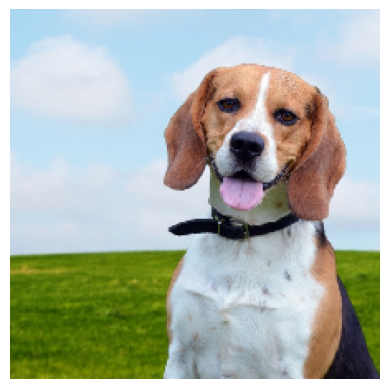

In [ ]:
from tensorflow.keras.preprocessing import image

# 이미지 다운로드 (예: 개 사진)
!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg

# 이미지 로드 및 전처리
img = image.load_img('dog.jpg', target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

- 이미지를 불러와서 모델의 입력 크기에 맞게 조정합니다.
- preprocess_input 함수를 사용하여 전처리를 수행합니다.

### 5.1.4 예측 및 결과 해석

In [ ]:
# 예측 수행
preds = vggnet_pretrained.predict(x)

# 예측 결과 디코딩
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02088364', 'beagle', 0.8384029), ('n02089973', 'English_foxhound', 0.08918256), ('n02089867', 'Walker_hound', 0.06241594)]


- 모델을 사용하여 예측을 수행합니다.
- decode_predictions 함수를 사용하여 예측 결과를 해석 가능한 라벨로 변환합니다.

- 예측 결과
    - 가장 높은 확률로 beagle(비글)로 분류되었습니다.


## 5.2 PyTorch에서의 전이 학습

### 5.2.1 필요한 라이브러리 Import

In [ ]:
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import torch

### 5.2.2 사전 학습된 VGG19 모델 로드

In [ ]:
# 사전 학습된 VGG19 모델 로드
vggnet_pretrained = models.vgg19(pretrained=True)
vggnet_pretrained.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 76.0MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

- pretrained=True로 설정하여 ImageNet 가중치를 불러옵니다.
- eval() 메서드를 호출하여 모델을 평가 모드로 전환합니다.


### 5.2.3 이미지 불러오기 및 전처리

In [ ]:
# 이미지 로드
img = Image.open('dog.jpg')

# 이미지 전처리
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet의 평균
        std=[0.229, 0.224, 0.225]    # ImageNet의 표준편차
    )
])

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

- transforms를 사용하여 이미지에 대한 일련의 전처리를 정의합니다.
- 이미지를 텐서로 변환하고, 정규화합니다.

### 5.2.4 예측 및 결과 해석

In [ ]:
# 예측 수행
with torch.no_grad():
    out = vggnet_pretrained(batch_t)

# ImageNet의 클래스 인덱스 로드
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

# 예측 결과 확인
probabilities = torch.nn.functional.softmax(out[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    print(classes[top5_catid[i]], top5_prob[i].item())

--2024-10-24 20:06:13--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-10-24 20:06:13 (74.1 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]

beagle 0.7160818576812744
Walker hound 0.1965356469154358
English foxhound 0.06983742862939835
bluetick 0.009613243862986565
Brittany spaniel 0.005023482721298933


- 모델을 사용하여 예측을 수행합니다.
- softmax 함수를 적용하여 확률로 변환합니다.
- 상위 5개의 예측 결과를 출력합니다.

- 예측 결과
    - 가장 높은 확률로 beagle(비글)로 분류되었습니다.


## 6. TensorFlow와 PyTorch 구현 비교

- 모델 구현 방식

    - TensorFlow
        - Keras의 함수형 API를 사용하여 모델을 정의했습니다.
        - Conv2D, MaxPooling2D, Flatten, Dense, Dropout 등의 레이어를 순차적으로 쌓아 모델을 구성했습니다.
    - PyTorch
        - nn.Module을 상속하여 클래스로 모델을 정의했습니다.
        - nn.Sequential을 사용하여 특징 추출 부분과 분류 부분을 순차적으로 쌓았습니다.

- 전이 학습 사용 방법

    - 두 프레임워크 모두 사전 학습된 모델을 불러오는 간단한 방법을 제공합니다.
    - TensorFlow는 keras.applications 모듈을 사용하고, PyTorch는 torchvision.models를 사용합니다.

- 이미지 전처리

    - TensorFlow
        - preprocess_input 함수를 사용하여 이미지를 모델에 맞게 전처리했습니다.
    - PyTorch
        - transforms를 사용하여 이미지를 리사이즈, 크롭, 텐서 변환, 정규화했습니다.

- 예측 결과 해석

    - TensorFlow는 decode_predictions 함수를 사용하여 예측 결과를 사람이 이해할 수 있는 라벨로 변환했습니다.

    - PyTorch는 별도의 클래스 인덱스 파일(imagenet_classes.txt)을 불러와서 예측 결과를 해석했습니다.


## 7. 결론

- 우리는 위의 과정을 통해서 VGGNet의 구조와 특징을 이해하고, TensorFlow와 PyTorch에서 직접 구현해보았습니다.

- 또한, 전이 학습을 통해 사전 학습된 모델을 불러와 사용하는 방법을 알아보았습니다.

- 두 프레임워크 모두 사전 학습된 모델을 쉽게 사용할 수 있으며, 이를 통해 모델 학습 시간을 절약하고 높은 성능을 얻을 수 있습니다.

- TensorFlow와 PyTorch의 모델 구현 방식과 사용 방법을 비교하여 이해함으로써, 상황에 맞는 프레임워크를 선택하고 활용할 수 있습니다.

## 8. 과제

### 과제 1: VGGNet 모델 구조 타이핑 및 이해

- 목표
    - VGGNet 모델의 구조를 직접 타이핑해보면서 각 레이어가 어떻게 쌓이는지 연습해보세요.
- 방법
    - TensorFlow 또는 PyTorch를 선택하여 VGGNet 모델의 코드를 한 번 타이핑해보세요.
    - 각 레이어의 역할과 파라미터 수를 주석으로 달아가며 이해를 돕습니다.
    - 구현한 모델의 summary를 출력하여 모델 구조를 확인합니다.

### 과제 2: VGGNet에 대한 추가 조사 및 정리
    - 목표
        - VGGNet에 대해 추가로 연구하고, 해당 모델에 대해 정리해보세요.
    - 방법
        - VGGNet의 역사와 발전 과정에 대해 조사해보세요.
        - VGGNet의 다양한 변형(VGG16, VGG19 등)에 대해 알아보세요.
        - VGGNet이 다른 CNN 모델과 비교했을 때 가지는 장단점을 정리해보세요.
    - 그리고, 자신의 말로 이해한 내용을 노션에 정리해주세요.

### 과제 3: 사전 학습된 VGGNet 모델을 사용한 분류 실습

- 목표
    - 사전 학습된 VGGNet 모델을 사용하여 자신만의 이미지를 분류해보세요.

- 방법
    - TensorFlow 또는 PyTorch를 선택하여 사전 학습된 VGGNet 모델을 불러옵니다.
    - 분류하고자 하는 이미지를 선택하여 전처리합니다.
    - 모델을 사용하여 이미지를 분류하고, 예측 결과를 해석합니다.
    - 결과를 시각화하여 제출하세요.

- Reference

    - [VGG-Net Architecture Explained](https://medium.com/@siddheshb008/vgg-net-architecture-explained-71179310050f)
    - [Understanding of VGG-16, VGG-19](https://wikidocs.net/164796)